# Precision vs. Prune Ratio

This notebook will look at how the threshold value effects the prune ratio and precision in the tour predicted by a model.

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import model_utils as M

import seaborn as sns
import matplotlib.pyplot as plt

Load in the models.

In [2]:
TSP_NB = joblib.load('Models/TSP_NB_model.pkl')
TSP_LR = joblib.load('Models/TSP_LR_model.pkl')
TSP_RF = joblib.load('Models/TSP_RF_model.pkl')

Load the test data.

In [3]:
DATA_DIR = '../6_feature_engineering/Feature_Dataset/'
data_files = [i for i in os.listdir(DATA_DIR) if i.endswith('.csv')]
data_files.sort()
df_TSP_list = [pd.read_csv(DATA_DIR + file) for file in data_files]

for i in range(len(df_TSP_list)):
    # Convert booleans to int
    df_TSP_list[i] = df_TSP_list[i].astype({'IS_IN_1ST_QUARTILE': 'int64',
                                            'IS_IN_2ND_QUARTILE': 'int64',
                                            'IS_IN_3RD_QUARTILE': 'int64',
                                            'EDGE_IN_SOL': 'int64'})
    df_TSP_list[i] = df_TSP_list[i].reset_index(drop=True)
    
train_set = df_TSP_list[:5]
test_set = df_TSP_list[5:]

test_set[0].shape

(499500, 8)

Load the coordinates for the test data.

In [4]:
COORD_DATA_DIR = '../5_ground_truth/Final_Dataset/'
coord_datafiles = [i for i in os.listdir(COORD_DATA_DIR) if i.endswith('.csv')]
coord_datafiles.sort()

df_coord_list = [pd.read_csv(COORD_DATA_DIR + file) for file in coord_datafiles]

for i in range(len(df_coord_list)):
    df_coord_list[i]['NODE1_COORDS'] = df_coord_list[i]['NODE1_COORDS'].apply(eval)
    df_coord_list[i]['NODE2_COORDS'] = df_coord_list[i]['NODE2_COORDS'].apply(eval)

train_coords = df_coord_list[:5]
test_coords = df_coord_list[5:]

test_coords[0].shape

(499500, 7)

Constant Variables.

In [11]:
set_num = 0 # For changing between different test graphs
cols = test_set[set_num].columns[:-1]  # Every column except the last one

## Naïve Bayes: Prune Ratio vs. Precision

In [5]:
step = 0.05 # size between threshold values

In [13]:
NB_precisions = np.array([])
NB_prune_ratio = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_NB, threshold=t)
    NB_precisions = np.append(NB_precisions, M.precision(tour))
    NB_prune_ratio = np.append(NB_prune_ratio, M.prune_ratio(tour, test_coords[set_num].shape[0]))

print("Naïve Bayes")
print("Precision: {}".format(NB_precisions))
print("Prune ratio: {}".format(NB_prune_ratio))

Naïve Bayes
Precision: [0.01524586 0.10384696 0.10635091 0.10794275 0.1091954  0.11039106
 0.11144952 0.11260543 0.11370699 0.11424933 0.11508862 0.11565982
 0.11688004 0.11806969 0.1191109  0.12031727 0.12169835 0.12349699
 0.12621608 0.13091441 1.        ]
Prune ratio: [0.86881682 0.98095295 0.9814014  0.98167568 0.98188589 0.98208208
 0.98225225 0.98243443 0.9826046  0.9827047  0.98283083 0.98293293
 0.98311111 0.98328128 0.98342743 0.98359359 0.98377978 0.98401602
 0.98436036 0.98493694 1.        ]


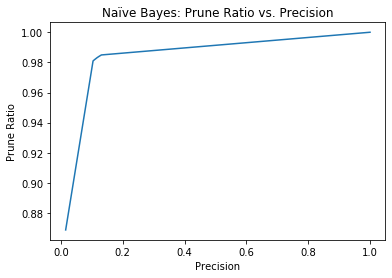

In [16]:
df = pd.DataFrame({"NB precisions": NB_precisions, 
                   "NB prune ratio": NB_prune_ratio})


ax = sns.lineplot(x="NB precisions", y="NB prune ratio", data=df)
#ax.figure.legend()
ax.set_xlabel('Precision')
ax.set_ylabel('Prune Ratio')

plt.title("Naïve Bayes: Prune Ratio vs. Precision")

plt.show()

## Logistic Regression: Prune Ratio vs. Precision

In [17]:
LR_precisions = np.array([])
LR_prune_ratio = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_LR, threshold=t)
    LR_precisions = np.append(LR_precisions, M.precision(tour))
    LR_prune_ratio = np.append(LR_prune_ratio, M.prune_ratio(tour, test_coords[set_num].shape[0]))

print("Logistic Regression")
print("Precision: {}".format(LR_precisions))
print("Prune ratio: {}".format(LR_prune_ratio))

Logistic Regression
Precision: [0.002002   0.32728542 0.38284251 0.43746835 0.48201856 0.52431012
 0.5390411  0.59385113 0.6504298  0.6680203  0.75431607 0.7721519
 0.87326733 0.89303483 0.93220339 0.6        0.6        0.5
 0.5        1.         1.        ]
Prune ratio: [0.         0.99426226 0.99530931 0.99604605 0.99654855 0.99695295
 0.99707708 0.99752553 0.9979039  0.99802803 0.99849249 0.99857658
 0.99898899 0.9991952  0.99940941 0.99998999 0.99998999 0.999996
 0.999996   0.999998   1.        ]


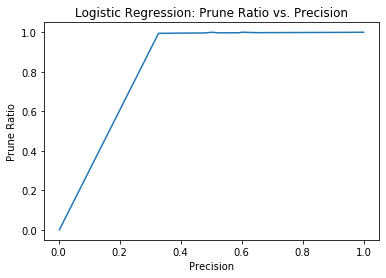

In [18]:
df = pd.DataFrame({"LR precisions": LR_precisions, 
                   "LR prune ratio": LR_prune_ratio})


ax = sns.lineplot(x="LR precisions", y="LR prune ratio", data=df)
#ax.figure.legend()
ax.set_xlabel('Precision')
ax.set_ylabel('Prune Ratio')

plt.title("Logistic Regression: Prune Ratio vs. Precision")

plt.show()

## Random Forest: Prune Ratio vs. Precision

In [20]:
RF_precisions = np.array([])
RF_prune_ratio = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_RF, threshold=t)
    RF_precisions = np.append(RF_precisions, M.precision(tour))
    RF_prune_ratio = np.append(RF_prune_ratio, M.prune_ratio(tour, test_coords[set_num].shape[0]))

print("Random Forest")
print("Precision: {}".format(RF_precisions))
print("Prune ratio: {}".format(RF_prune_ratio))

Random Forest
Precision: [0.002002   0.35517891 0.44069479 0.50533808 0.55904437 0.59606657
 0.64452114 0.692      0.74655963 0.77150193 0.79750347 0.82908546
 0.85619835 0.86740331 0.88659794 0.9047619  0.91256831 0.92380952
 0.94672131 0.94219653 1.        ]
Prune ratio: [0.         0.99468468 0.99596597 0.99662462 0.99706707 0.99735335
 0.99767968 0.997998   0.99825425 0.99844044 0.99855656 0.99866466
 0.99878879 0.99891291 0.99902903 0.99915916 0.99926727 0.99936937
 0.99951151 0.99965365 1.        ]


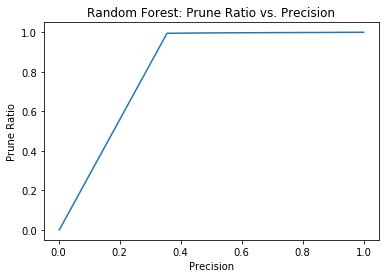

In [21]:
df = pd.DataFrame({"RF precisions": RF_precisions, 
                   "RF prune ratio": RF_prune_ratio})


ax = sns.lineplot(x="RF precisions", y="RF prune ratio", data=df)
#ax.figure.legend()
ax.set_xlabel('Precision')
ax.set_ylabel('Prune Ratio')

plt.title("Random Forest: Prune Ratio vs. Precision")

plt.show()